<a href="https://colab.research.google.com/github/ParameshMalla/dataSciencePractiseNotebooks/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Timeit

In [ ]:
import timeit

In [ ]:
gen = (x*2 for x in range(100))

In [ ]:
genl = [x*2 for x in range(100)]

In [ ]:
%timeit sum(gen)

The slowest run took 135.92 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 89.7 ns per loop


In [ ]:
%timeit sum(genl)

The slowest run took 6.42 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 552 ns per loop


## Pandas

In [1]:
import pandas as pd
import numpy as np

### Series

In [2]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
obj.values

array([ 4,  7, -5,  3])

In [4]:
# Setting index
obj2 = pd.Series([4, 7, -5, 3], index=['a','b','c','d'])
obj2

a    4
b    7
c   -5
d    3
dtype: int64

In [5]:
obj2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [6]:
obj2['a']

4

In [7]:
'f' in obj2

False

In [8]:
# Create Series with python dict object
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = pd.Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

### DataFrame

In [9]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [10]:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [11]:
# To Specify the order of column
pd.DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [12]:
# Passing an unknown column creates missing values
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four',
                      'five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [13]:
# Retrieving columns
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [14]:
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [15]:
# Retrieving rows
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [16]:
# Nested dict of dicts If the nested dict is passed to the DataFrame, 
# pandas will interpret the outer dict keys as the columns and the inner keys 
# as the row indices:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
     'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [17]:
# Teansposing the the frame
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [31]:
frame3.index.name ='year'
frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


Possible data inputs to DataFrame constructor

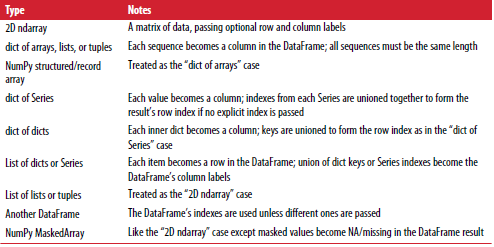

### Index Objects

pandas’s Index objects are responsible for holding the axis labels and other metadata

In [47]:
obj = pd.Series(range(3), index=['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

Index objects are immutable. Immutability makes it safer to share Index objects among data structures:

In [36]:
labels = pd.Index(np.arange(3))
obj2 = pd.Series([1.5,-2.5,0], index=labels)
obj2

0    1.5
1   -2.5
2    0.0
dtype: float64

Unlike Python sets, a pandas Index can contain duplicate labels:

In [46]:
dup_labels = pd.Index(['foo', 'foo', 'bar', 'bar'])

Some Index methods and properties

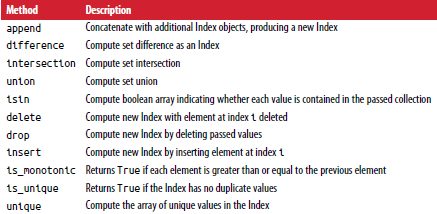

### Reindexing

In [50]:
obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

Calling reindex on this Series rearranges the data according to the new index, introducing
missing values if any index values were not already present

In [39]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

reindex function arguments

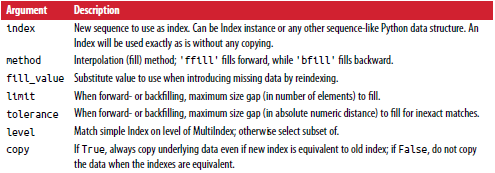

### Dropping Entries from an Axis

In [41]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
         index=['Ohio', 'Colorado', 'Utah', 'New York'],
         columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [42]:
data.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


Drop values from the columns by passing axis=1 or axis='columns'

In [43]:
data.drop('two', axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


inplace returns the original object with the manipulation. inplace destroys the any data that is dropped

In [51]:
obj.drop('c', inplace=True)
obj

d    4.5
b    7.2
a   -5.3
dtype: float64

### Selection with loc and iloc

In [52]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [53]:
data.loc['Colorado']

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [54]:
data.loc[:,'two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [55]:
data.iloc[:,1]

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [56]:
data.loc['Colorado',['two','three']]

two      5
three    6
Name: Colorado, dtype: int64

In [57]:
data.iloc[2, [3, 0, 1]]

four    11
one      8
two      9
Name: Utah, dtype: int64

In [58]:
data.iloc[1,[1,2]]

two      5
three    6
Name: Colorado, dtype: int64

Indexing option with DataFrame

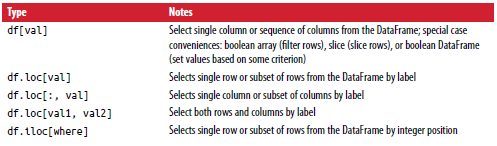

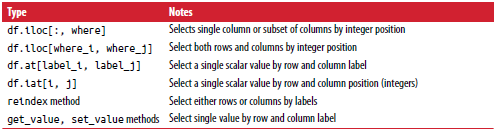

### Function Application and Mapping

In [59]:
import requests

url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/'

def getFile(filename):
  r = requests.get(url+filename)
  if r.status_code == 200:
    with open(filename,'wb') as f:
      print('Downloading '+filename)
      f.write(r.content)
    print('Downloaded')
  else:
    print('File not found')
  

In [60]:
getFile('ex2.csv')

Downloaded


In [61]:
!cat ex1.csv

cat: ex1.csv: No such file or directory


In [62]:
getFile('csv_mindex.csv')

Downloaded


In [63]:
df = pd.read_csv('csv_mindex.csv')
df

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [64]:
df.set_index(['key1','key2'])

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16